In [17]:
from glob import glob

import nibabel as nib
from nibabel.brikhead import *

## Reading the data

### Header: `.head` files

In [ ]:
header = AFNIHeader(parse_AFNI_header('./s02/ad_lh_rh_vs/s02.results/pb02.s02.r01.blur+tlrc.HEAD'))

In [ ]:
header.get_data_shape() # naively tells you what shape .brik has

### Data: `.brik` files

just use `nib.load`

In [20]:
s02_dir = './s02/ad_lh_rh_vs/s02.results/'
brik = nib.load(f'{s02_dir}/pb02.s02.r01.blur+tlrc.BRIK')

['./s02/ad_lh_rh_vs/s02.results\\pb02.s02.r01.blur+tlrc.BRIK',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r01.blur+tlrc.HEAD',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r02.blur+tlrc.BRIK',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r02.blur+tlrc.HEAD',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r03.blur+tlrc.BRIK',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r03.blur+tlrc.HEAD',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r04.blur+tlrc.BRIK',
 './s02/ad_lh_rh_vs/s02.results\\pb02.s02.r04.blur+tlrc.HEAD']

data consists of `(64, 76, 64)` voxels with 30 timestamps(measured with 60secs, TR=2)

In [22]:
brik.shape

(64, 76, 64, 30)

In [35]:
whole = brik.get_fdata()

## Get ROI

In [42]:
ad = nib.load('./stats/ttest/Clust_ad_0p00001+tlrc.BRIK.gz').get_fdata()

ad_pos = [(x, y, z) for x, y, z in zip(*np.where(ad != 0)[:-1])]

## Draw HRF with scipy.stats gamma

In [28]:
from scipy.stats import gamma
import matplotlib.pyplot as plt

In [30]:
def sample_hrf(times):
    
    peak_values = gamma.pdf(times, 6)
    undershoot_values = gamma.pdf(times, 12)
    
    values = peak_values - 0.35 * undershoot_values
    return values / np.max(values) * 0.6

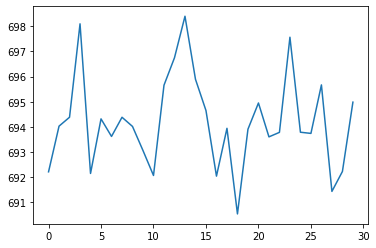

In [59]:
plt.plot(whole[ad_pos[0]])

In [78]:
np.sum(whole[p] for p in ad_pos) / len(ad_pos)

<ipython-input-78-911f679d25d7>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  np.sum(whole[p] for p in ad_pos) / len(ad_pos)


array([712.71224976, 711.59639486, 715.65416463, 714.17563883,
       712.99129028, 713.13711141, 713.43453979, 714.50793864,
       715.3414388 , 714.24032186, 714.13745728, 712.94888306,
       715.91298625, 720.51322835, 716.42850545, 712.49010213,
       711.36983846, 711.86590169, 712.38032633, 715.66875407,
       715.06452433, 714.90030721, 713.24330037, 714.30494181,
       714.73956502, 711.46162923, 710.234198  , 710.14152425,
       712.74313965, 712.50687866])

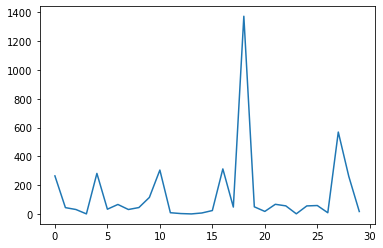

In [70]:
plt.plot(sample_hrf(whole[ad_pos[0]]))

<ipython-input-79-98a8241b0205>:1: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  plt.plot(sample_hrf(np.sum(whole[p] for p in ad_pos) / len(ad_pos)))


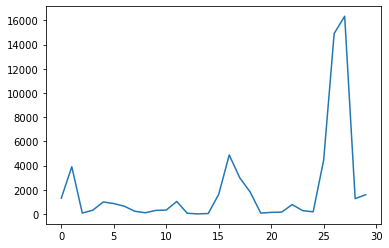

In [79]:
plt.plot(sample_hrf(np.sum(whole[p] for p in ad_pos) / len(ad_pos)))

In [56]:
sample_hrf(whole[ad_pos[0]])

array([2.64463601e+02, 4.42592427e+01, 3.12353212e+01, 8.07492405e-01,
       2.81747799e+02, 3.33068299e+01, 6.62090237e+01, 3.12615998e+01,
       4.47699506e+01, 1.15098912e+02, 3.04940925e+02, 8.91491774e+00,
       3.04438746e+00, 6.00000000e-01, 7.07038618e+00, 2.40253724e+01,
       3.12957111e+02, 4.81913807e+01, 1.37270725e+03, 4.99119113e+01,
       1.78812363e+01, 6.73319981e+01, 5.64320743e+01, 1.36377371e+00,
       5.61379371e+01, 5.88060024e+01, 8.81427692e+00, 5.68765607e+02,
       2.61101633e+02, 1.73053251e+01])

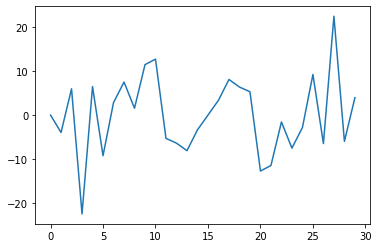

In [66]:
plt.plot(np.fft.fft(whole[ad_pos[0]]).imag)

In [47]:
ad[ad!=0].sum()

30.0

In [55]:
whole[ad_pos[0]]

array([692.21069336, 694.02716064, 694.38128662, 698.09533691,
       692.1463623 , 694.31604004, 693.61791992, 694.38043213,
       694.01550293, 693.05603027, 692.065979  , 695.65527344,
       696.74694824, 698.39709473, 695.89080811, 694.64794922,
       692.03961182, 693.94067383, 690.53723145, 693.9050293 ,
       694.94805908, 693.60083008, 693.78027344, 697.56286621,
       693.7855835 , 693.73840332, 695.66680908, 691.43255615,
       692.22369385, 694.98132324])

In [53]:
ad_pos

[(48, 36, 26),
 (48, 36, 27),
 (48, 36, 28),
 (48, 37, 26),
 (48, 37, 27),
 (49, 37, 27),
 (49, 38, 26),
 (49, 39, 26),
 (49, 39, 27),
 (49, 42, 25),
 (49, 43, 24),
 (50, 38, 26),
 (50, 39, 25),
 (50, 39, 26),
 (50, 39, 27),
 (50, 40, 25),
 (50, 40, 27),
 (50, 41, 25),
 (50, 42, 25),
 (50, 43, 24),
 (50, 43, 25),
 (51, 38, 26),
 (51, 39, 26),
 (51, 40, 25),
 (51, 40, 26),
 (51, 41, 25),
 (51, 43, 24),
 (51, 44, 24),
 (52, 39, 26),
 (52, 40, 26)]